# Starbucks Capstone Challenge

Project Definition:
This project uses Starbucks data from the rewards program to engage with customers on various offers Starbucks has. The motivation for this project is that I am a regular Starbucks customer and I wanted to utilize this dataset for this project to understand how they attract their customers to increase sales.

There are 3 data files in this project as listed below.
1- profile.json which provides has data on the customers from Starbucks who uses the rewards program.
2- portfolio.json which provides data on the actual offers which Starbucks defines.
3- transcript.json which provides data on the actual offer and customer associations which result in purchases.

Problem Statement-
The problem selected is to determine the communication channel with the biggest impact on customers which will increase purchases hence increase sales for Starbucks.

In [1]:
#import the relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
#read the json files into pandas data frames
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
#describe the data
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [4]:
#describe the datatypes
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [5]:
#describe the data
portfolio.describe()

,reward,difficulty,duration,webchannels,emailchannels,mobilechannels,socialchannels
count,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000
mean,4.200000,7.700000,6.500000,0.800000,1.0,0.900000,0.600000
std,3.583915,5.831905,2.321398,0.421637,0.0,0.316228,0.516398
min,0.000000,0.000000,3.000000,0.000000,1.0,0.000000,0.000000
25%,2.000000,5.000000,5.000000,1.000000,1.0,1.000000,0.000000
50%,4.000000,8.500000,7.000000,1.000000,1.0,1.000000,1.000000
75%,5.000000,10.000000,7.000000,1.000000,1.0,1.000000,1.000000
max,10.000000,20.000000,10.000000,1.000000,1.0,1.000000,1.000000


In [6]:
#describe the datatypes
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reward          10 non-null     int64 
 1   channels        10 non-null     object
 2   difficulty      10 non-null     int64 
 3   duration        10 non-null     int64 
 4   offer_type      10 non-null     object
 5   id              10 non-null     object
 6   webchannels     10 non-null     int64 
 7   emailchannels   10 non-null     int64 
 8   mobilechannels  10 non-null     int64 
 9   socialchannels  10 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 928.0+ bytes


In [7]:
#describe the data
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [8]:
#describe the datatypes
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [9]:
#get the first few records to understand the data
profile.head(5)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [10]:
#get the first few records to understand the data
portfolio.head(5)

,reward,channels,difficulty,duration,offer_type,id,webchannels,emailchannels,mobilechannels,socialchannels
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0


In [11]:
#get the first few records to understand the data
transcript.head(5)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


array([[<Axes: title={'center': 'time'}>]], dtype=object)

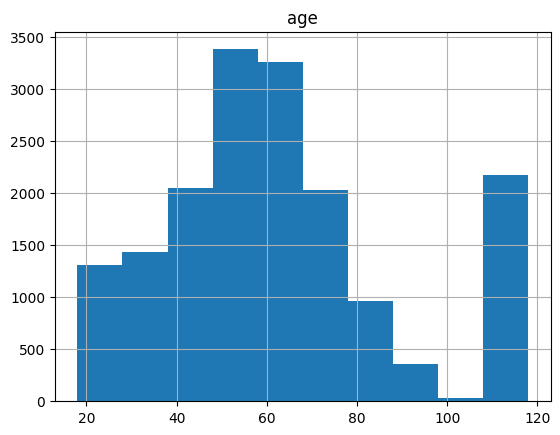

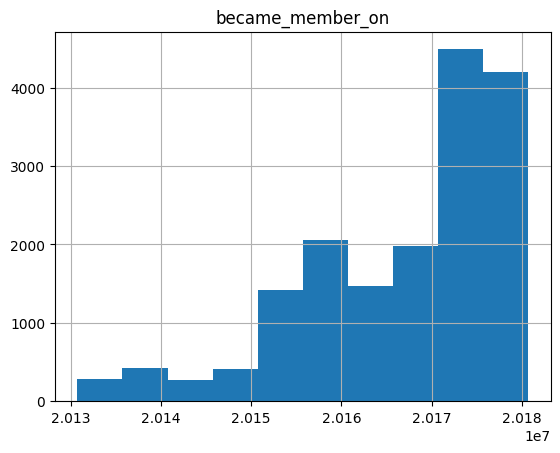

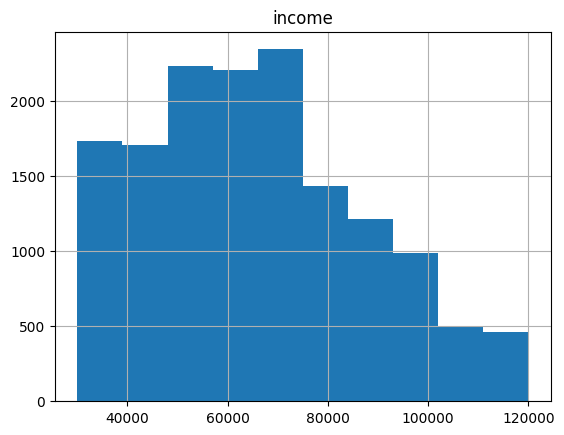

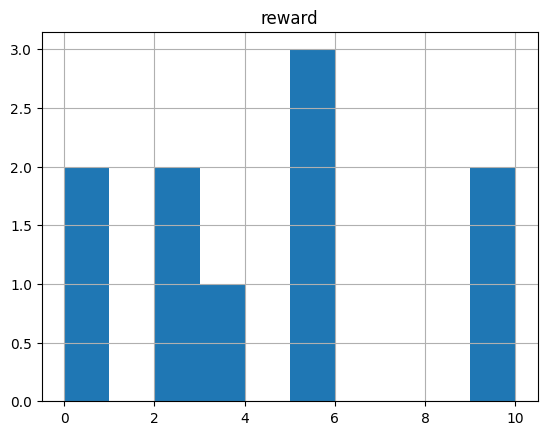

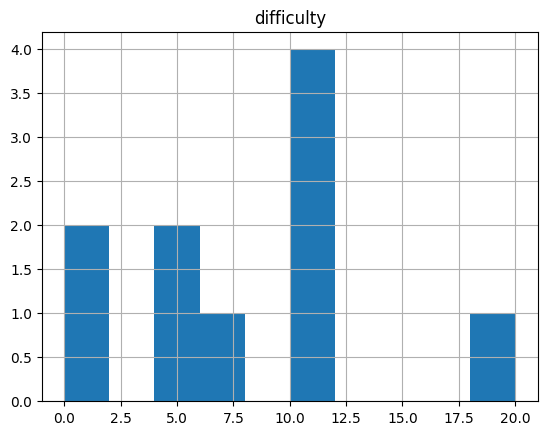

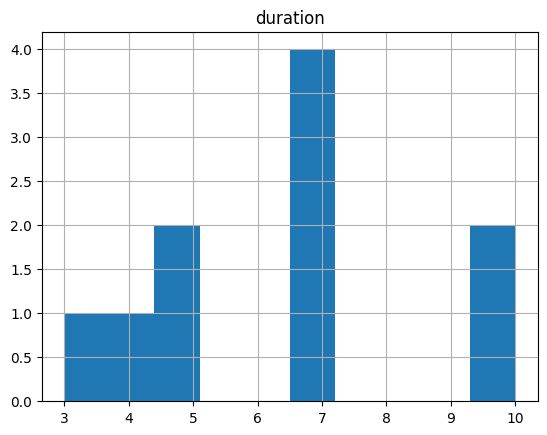

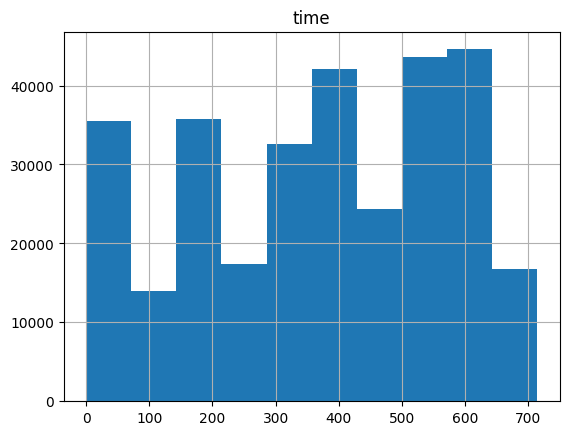

In [12]:
#visualize the spread of the data
profile.hist(column='age')
profile.hist(column='became_member_on')
profile.hist(column='income')

portfolio.hist(column='reward')
portfolio.hist(column='difficulty')
portfolio.hist(column='duration')

transcript.hist(column='time')

In [13]:
#check for nulls
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [14]:
#check for nulls
portfolio.isnull().sum()

reward            0
channels          0
difficulty        0
duration          0
offer_type        0
id                0
webchannels       0
emailchannels     0
mobilechannels    0
socialchannels    0
dtype: int64

In [15]:
#check for nulls
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [16]:
#drop duplicates
profile.drop_duplicates()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [17]:
#clean the data
#find the mean value in the dataset
profile['age'].mean()
#replace the outlier with the mean value
profile['age'].replace(118,63,inplace=True)

#find the mode value in the dataset
profile['gender'].mode()
#replace the nulls with the mode value
profile['gender'].fillna('M',inplace=True)

#find the mode value in the dataset
profile['income'].mode()
#replace the nulls with the mode value
profile['income'].fillna(73000,inplace=True)

In [ ]:
#rerun all the exploration code above to ensure the data is now clean

In [18]:
#rename the id column to be unique when combining with other id columns in other datasets
profile.rename(columns={'id':'profileid'}, inplace=True)
portfolio.rename(columns={'id':'portfolioid'}, inplace=True)

In [19]:
#extract the first values
transcript['firstvalues'] = transcript['value'].apply(lambda x: list(x.values())[0])
#assign the amount values when there is a transaction
transcript.loc[transcript['event']=='transaction','amountvalue']=transcript['firstvalues']  
#assign the offer completed when there is an offer completed
transcript['offercompleted']=transcript['event'].str.contains("offer completed")
#assign the column as int
transcript['offercompleted']=transcript['offercompleted'].astype(int)
#assign column for bogo
portfolio['offerbogo']=portfolio['offer_type'].str.contains("bogo")
#assign the column as int
portfolio['offerbogo']=portfolio['offerbogo'].astype(int)
#assign column for informational
portfolio['offerinformational']=portfolio['offer_type'].str.contains("informational")
#assign the column as int
portfolio['offerinformational']=portfolio['offerinformational'].astype(int)
#assign column for discount
portfolio['offerdiscount']=portfolio['offer_type'].str.contains("discount")
#assign the column as int
portfolio['offerdiscount']=portfolio['offerdiscount'].astype(int)
#remove rows where the offer is informational
portfolio.drop(portfolio[portfolio['offerinformational']==1].index, inplace=True)

In [20]:
#merge datasets for further processing into new data frame
trxns = pd.merge(portfolio,transcript, left_on="portfolioid", right_on="firstvalues", how='inner')

In [21]:
#merge datasets for further processing
trxns=pd.merge(trxns,profile, left_on="person", right_on="profileid")

In [22]:
#summarize the data
trxns.describe()

,reward,difficulty,duration,webchannels,emailchannels,mobilechannels,socialchannels,offerbogo,offerinformational,offerdiscount,time,offercompleted,age,became_member_on,income
count,141515.000000,141515.000000,141515.000000,141515.000000,141515.0,141515.00000,141515.000000,141515.000000,141515.0,141515.000000,141515.000000,141515.000000,141515.000000,1.415150e+05,141515.000000
mean,5.234025,9.296386,7.192700,0.872367,1.0,0.90283,0.676925,0.506074,0.0,0.493926,355.953927,0.237282,55.701523,2.016656e+07,67283.729640
std,3.035536,4.092034,1.783395,0.333682,0.0,0.29619,0.467653,0.499965,0.0,0.499965,198.172446,0.425418,16.413263,1.160007e+04,20437.199192
min,2.000000,5.000000,5.000000,0.000000,1.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,18.000000,2.013073e+07,30000.000000
25%,2.000000,7.000000,5.000000,1.000000,1.0,1.00000,0.000000,0.000000,0.0,0.000000,174.000000,0.000000,45.000000,2.016050e+07,52000.000000
50%,5.000000,10.000000,7.000000,1.000000,1.0,1.00000,1.000000,1.000000,0.0,0.000000,408.000000,0.000000,58.000000,2.017062e+07,69000.000000
75%,10.000000,10.000000,7.000000,1.000000,1.0,1.00000,1.000000,1.000000,0.0,1.000000,510.000000,0.000000,65.000000,2.017122e+07,79000.000000
max,10.000000,20.000000,10.000000,1.000000,1.0,1.00000,1.000000,1.000000,0.0,1.000000,714.000000,1.000000,101.000000,2.018073e+07,120000.000000


In [23]:
#get the first few records to understand the data
trxns.head()

,reward,channels,difficulty,duration,offer_type,portfolioid,webchannels,emailchannels,mobilechannels,socialchannels,...,value,time,firstvalues,amountvalue,offercompleted,gender,age,profileid,became_member_on,income
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,...,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0,ae264e3637204a6fb9bb56bc8210ddfd,NaN,0,M,64,4b0da7e80e5945209a1fdddfe813dbe0,20170909,100000.0
1,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,...,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},102,ae264e3637204a6fb9bb56bc8210ddfd,NaN,0,M,64,4b0da7e80e5945209a1fdddfe813dbe0,20170909,100000.0
2,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,...,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},504,ae264e3637204a6fb9bb56bc8210ddfd,NaN,0,M,64,4b0da7e80e5945209a1fdddfe813dbe0,20170909,100000.0
3,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,...,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},510,ae264e3637204a6fb9bb56bc8210ddfd,NaN,0,M,64,4b0da7e80e5945209a1fdddfe813dbe0,20170909,100000.0
4,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,...,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,510,ae264e3637204a6fb9bb56bc8210ddfd,NaN,1,M,64,4b0da7e80e5945209a1fdddfe813dbe0,20170909,100000.0


In [24]:
#explore the merged data
trxns.groupby(['event','offer_type'])['event'].count()

event            offer_type
offer completed  bogo          15669
                 discount      17910
offer received   bogo          30499
                 discount      30543
offer viewed     bogo          25449
                 discount      21445
Name: event, dtype: int64

In [25]:
#review the data in Excel
profile.to_excel("profile.xlsx")
#review the data in Excel
portfolio.to_excel("portfolio.xlsx")
#review the data in Excel
transcript.to_excel("transcript.xlsx")
#review the data in Excel
trxns.to_excel("trxns.xlsx")

In [26]:
#drop the columns which are not needed
trxns = trxns.drop(['gender','profileid','channels','offer_type','portfolioid','person','event','value','time','firstvalues','amountvalue','offerinformational','offerdiscount','offerbogo','difficulty','duration','reward','age','income','became_member_on'], axis=1)


In [27]:
#assign the data frame to X
X = trxns.drop('offercompleted',axis=1)

In [28]:
#assign the data frame to y
y = trxns['offercompleted']

In [29]:
#split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.70,random_state=100)

In [30]:
#create the model
randomforestmodel = RandomForestClassifier(n_estimators = 10, random_state = 0)

In [31]:
#fit the model
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [32]:
#generate the order of importance
orderofimportance = pd.Series(randomforestmodel.feature_importances_, index=X_train.columns).sort_values()

In [33]:
#show the order of importance
print(orderofimportance)

emailchannels     0.000000
mobilechannels    0.066356
webchannels       0.349336
socialchannels    0.584309
dtype: float64
